### Import libraries


In [1]:
import pathlib
import pandas as pd
import seaborn as sns
from matplotlib.colors import rgb2hex

import sys

sys.path.append("../utils")
from load_utils import split_data
from analysis_utils import get_class_colors, show_1D_umap, show_2D_umap, show_3D_umap

2023-05-25 16:29:37.399946: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


### Load training data


In [2]:
training_data_path = pathlib.Path(
    "../3.normalize_data/normalized_data/training_data.csv.gz"
)
training_data = pd.read_csv(training_data_path, compression="gzip", index_col=0)

training_data

,Mitocheck_Phenotypic_Class,Cell_UUID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,DP__efficientnet_1270,DP__efficientnet_1271,DP__efficientnet_1272,DP__efficientnet_1273,DP__efficientnet_1274,DP__efficientnet_1275,DP__efficientnet_1276,DP__efficientnet_1277,DP__efficientnet_1278,DP__efficientnet_1279
0,Large,21da27ab-873a-41f4-ab98-49170cae9a2d,397,618,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,1.526493,-0.388909,-0.715202,-0.939279,-0.077689,1.965509,18.685819,0.061676,2.641369,-0.086854
1,Large,82f7949b-4ea2-45c8-8dd9-7854caf49077,359,584,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,-0.482883,-1.354858,-0.856680,-0.934949,0.725091,2.255450,-0.565433,1.628086,-0.605625,-0.748135
2,Large,cec7234f-fe35-4411-aded-f8112bb31219,383,685,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,0.888706,1.350431,-0.648841,0.264205,0.131341,0.678315,0.171044,0.342206,-0.581597,0.505556
3,Large,43d9e7c9-c9ec-45ce-8820-048bfb896989,932,532,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,-1.001625,-0.801021,-0.586539,0.076197,0.599191,1.742090,0.365520,0.643759,-1.906097,1.019370
4,Large,63ce6652-338e-4afd-9c77-dbc0e903bf92,477,130,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,0.950706,-0.811825,-0.522427,-1.402842,-0.289940,2.661250,0.126978,-0.824945,-0.494285,1.763332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,OutOfFocus,380728fc-28b0-423f-b8a7-07be1af590d9,383,219,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,...,0.549654,8.142944,1.619399,-1.521878,-0.182734,-1.608294,-0.783477,-2.613400,0.442609,1.977761
2912,OutOfFocus,30ed67c7-8de2-4d78-bce9-3fa1aff28565,975,294,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,0.358861,6.294227,1.827482,-0.997080,-0.614779,-1.270435,-1.335869,-0.560155,0.836314,3.473351
2913,OutOfFocus,2960b13e-6090-4592-b2a9-d1c4c1b24b50,898,302,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,0.570003,10.106912,1.130243,-1.288302,-0.956321,-1.409762,-0.058448,-0.025529,0.628679,1.657651
2914,OutOfFocus,fbc9ce6a-2b29-4115-b218-4ee5b8c50ac1,946,281,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,-0.023441,11.088221,2.068912,-0.977407,-1.108647,-1.399433,-2.744383,-2.037700,0.667556,2.438798


### Preview and save single-cell counts per phenotypes


In [3]:
# define results directory
results_dir = pathlib.Path("results/")
results_dir.mkdir(parents=True, exist_ok=True)

# get single-cell class counts
single_cell_class_counts = (
    training_data["Mitocheck_Phenotypic_Class"]
    .value_counts()
    .rename_axis("Mitocheck_Phenotypic_Class")
    .reset_index(name="Single_Cell_Counts")
)

# save single-cell class counts
single_cell_class_counts_save_path = pathlib.Path(
    f"{results_dir}/single_cell_class_counts.csv"
)
single_cell_class_counts.to_csv(single_cell_class_counts_save_path)

### Set UMAP display settings, save directory, class colors


In [4]:
point_size = 25
alpha = 0.6
color_palette = "bright"

classes_1 = [
    "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    "Folded",
    "SmallIrregular",
    "Polylobed",
    "Metaphase",
    "Binuclear",
    "Hole",
    "Anaphase",
    "MetaphaseAlignment",
    "Elongated",
    "OutOfFocus",
]

# classes that aren't commented out will get a color for their particular class
# those that are commented out will be colored gray and labeled "other"
classes_2 = [
    # "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    # "Folded",
    # "SmallIrregular",
    # "Polylobed",
    # "Metaphase",
    # "Binuclear",
    # "Hole",
    # "Anaphase",
    # "MetaphaseAlignment",
    # "Elongated",
    # "OutOfFocus",
]

class_colors_1 = get_class_colors(classes_1, "rainbow")
class_colors_2 = get_class_colors(classes_2, "bright")

### Create UMAPs


Showing UMAPs created with CP features


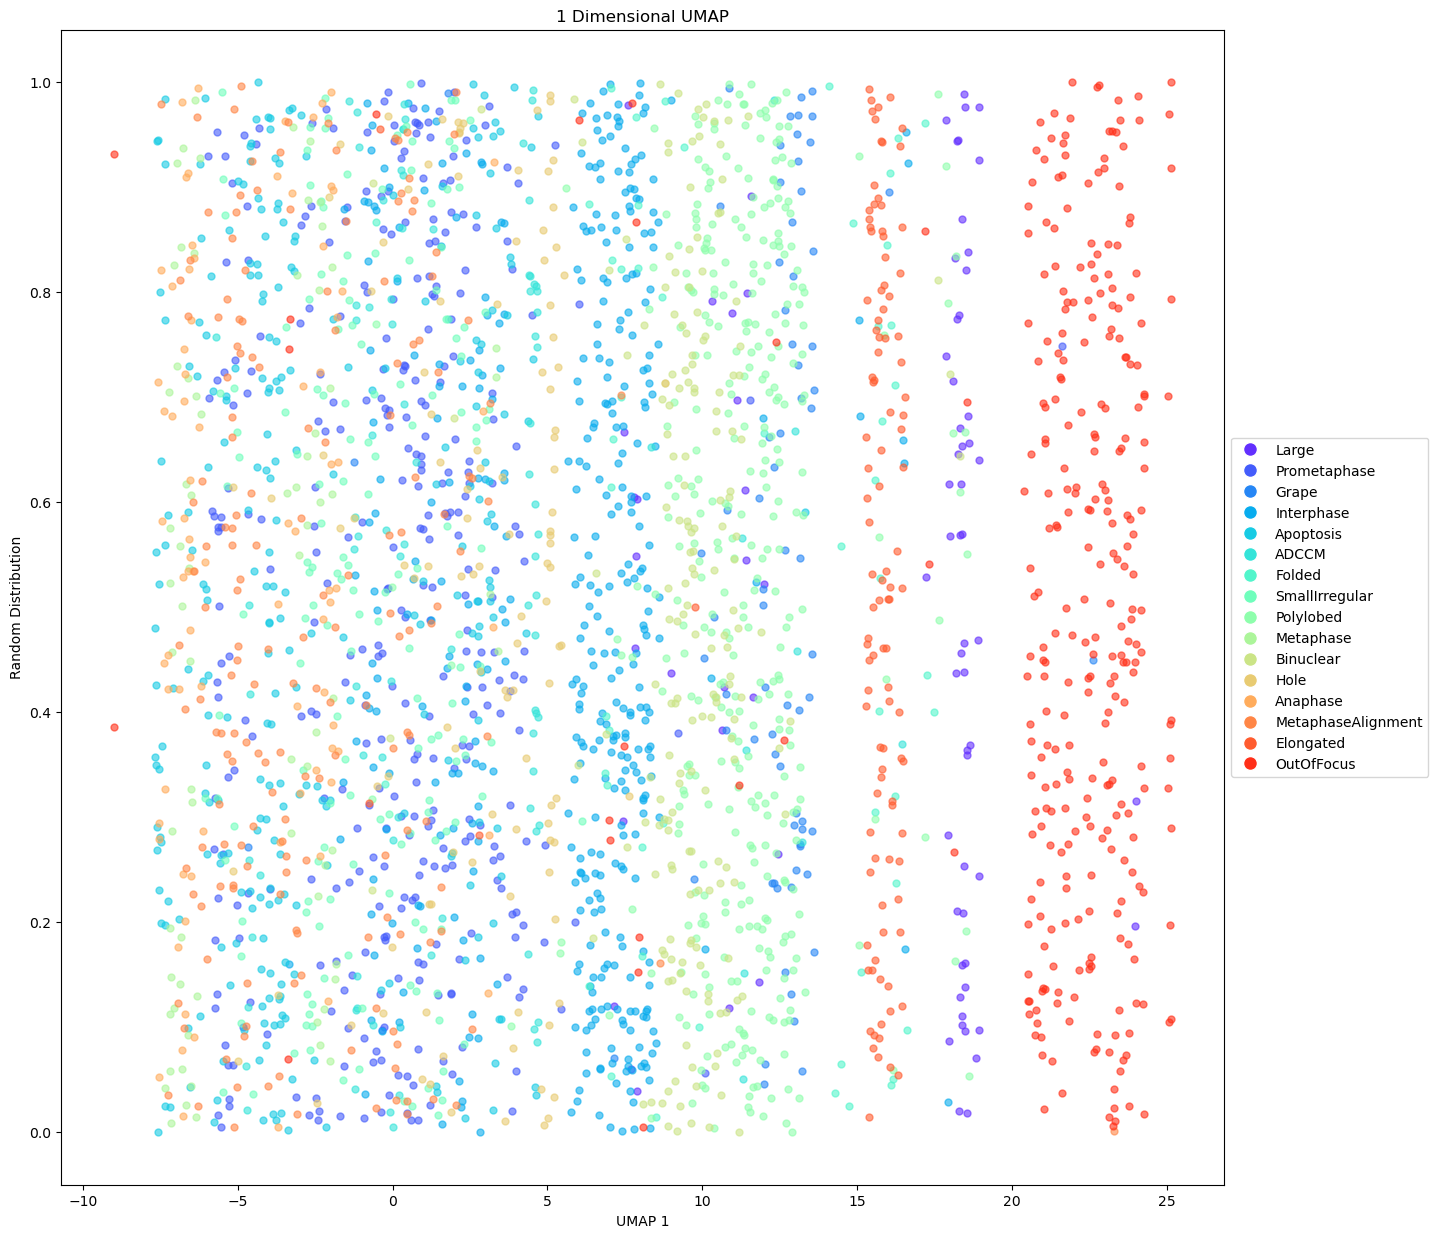

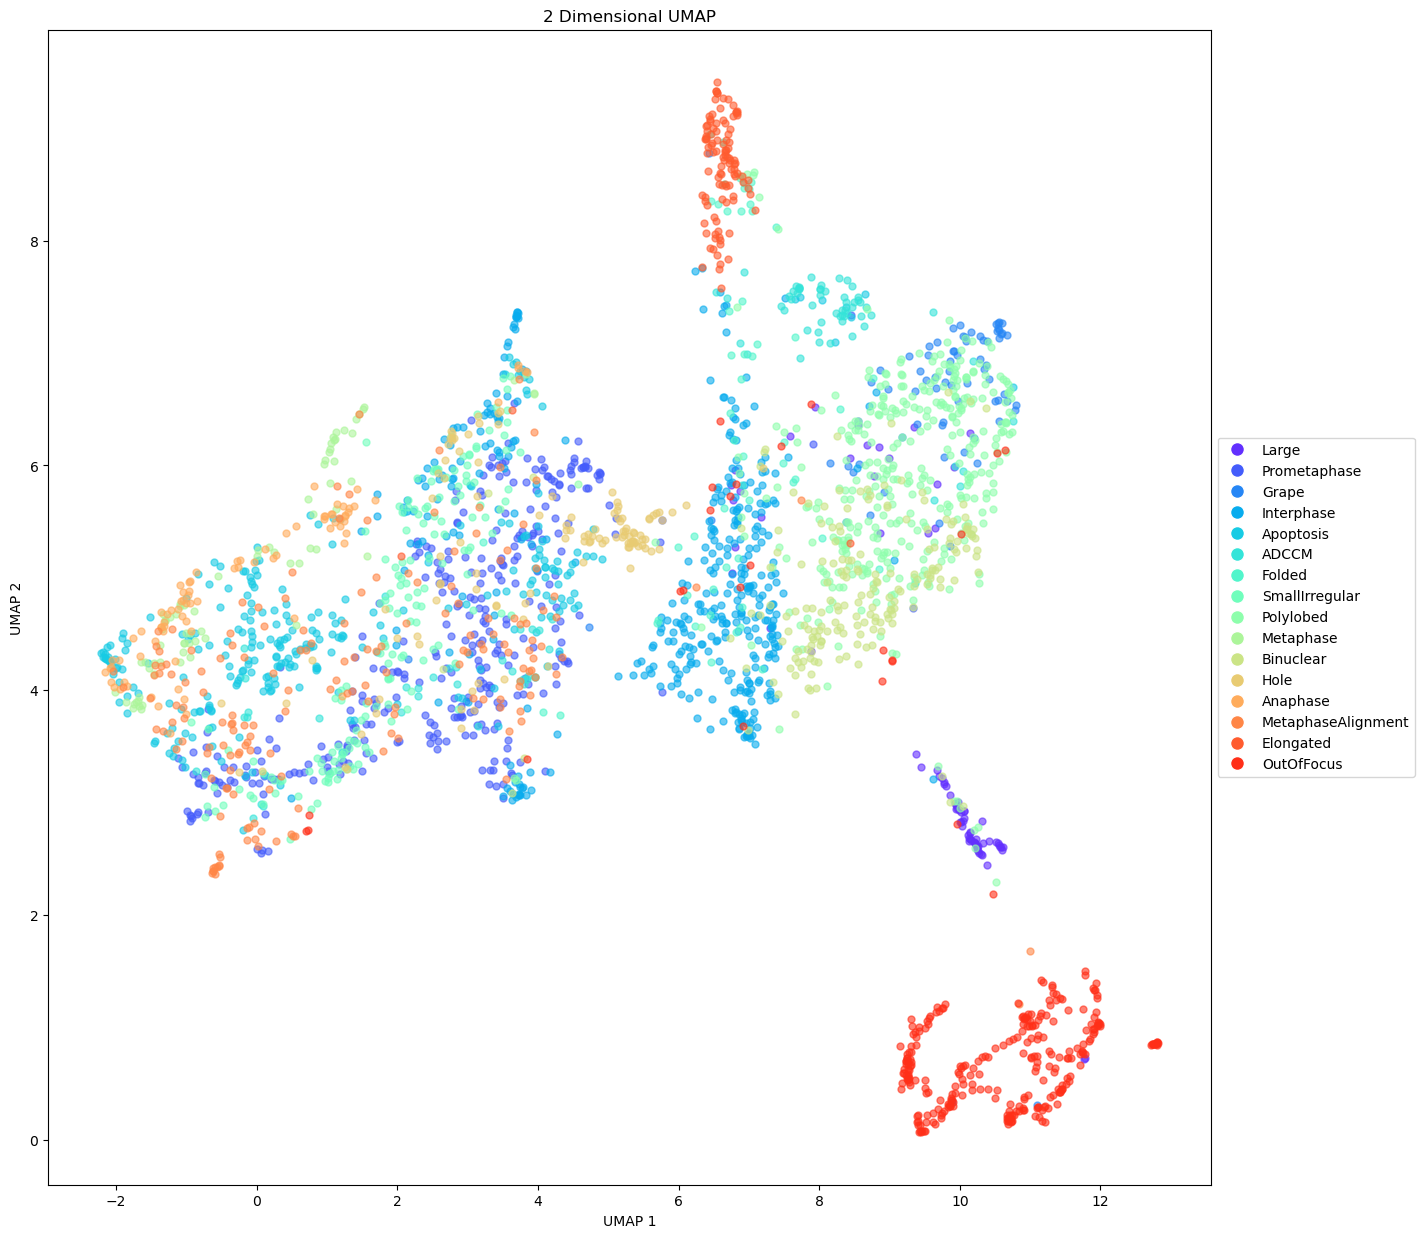

Showing UMAPs created with DP features


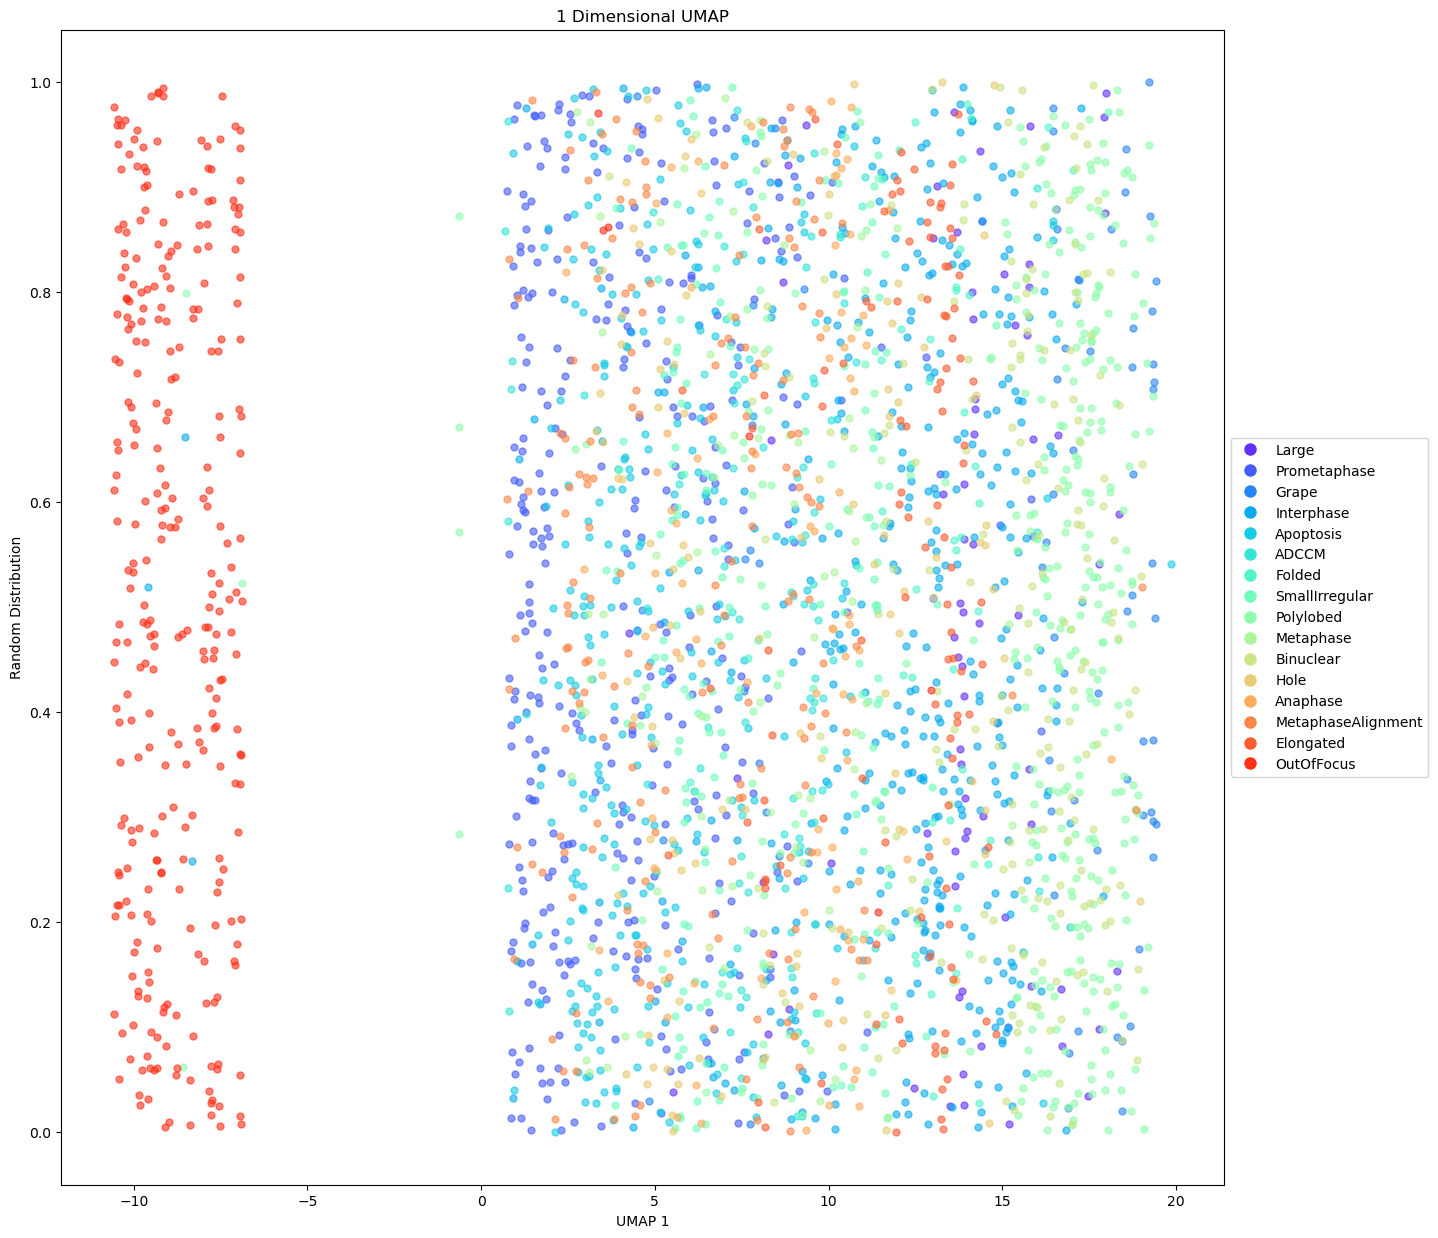

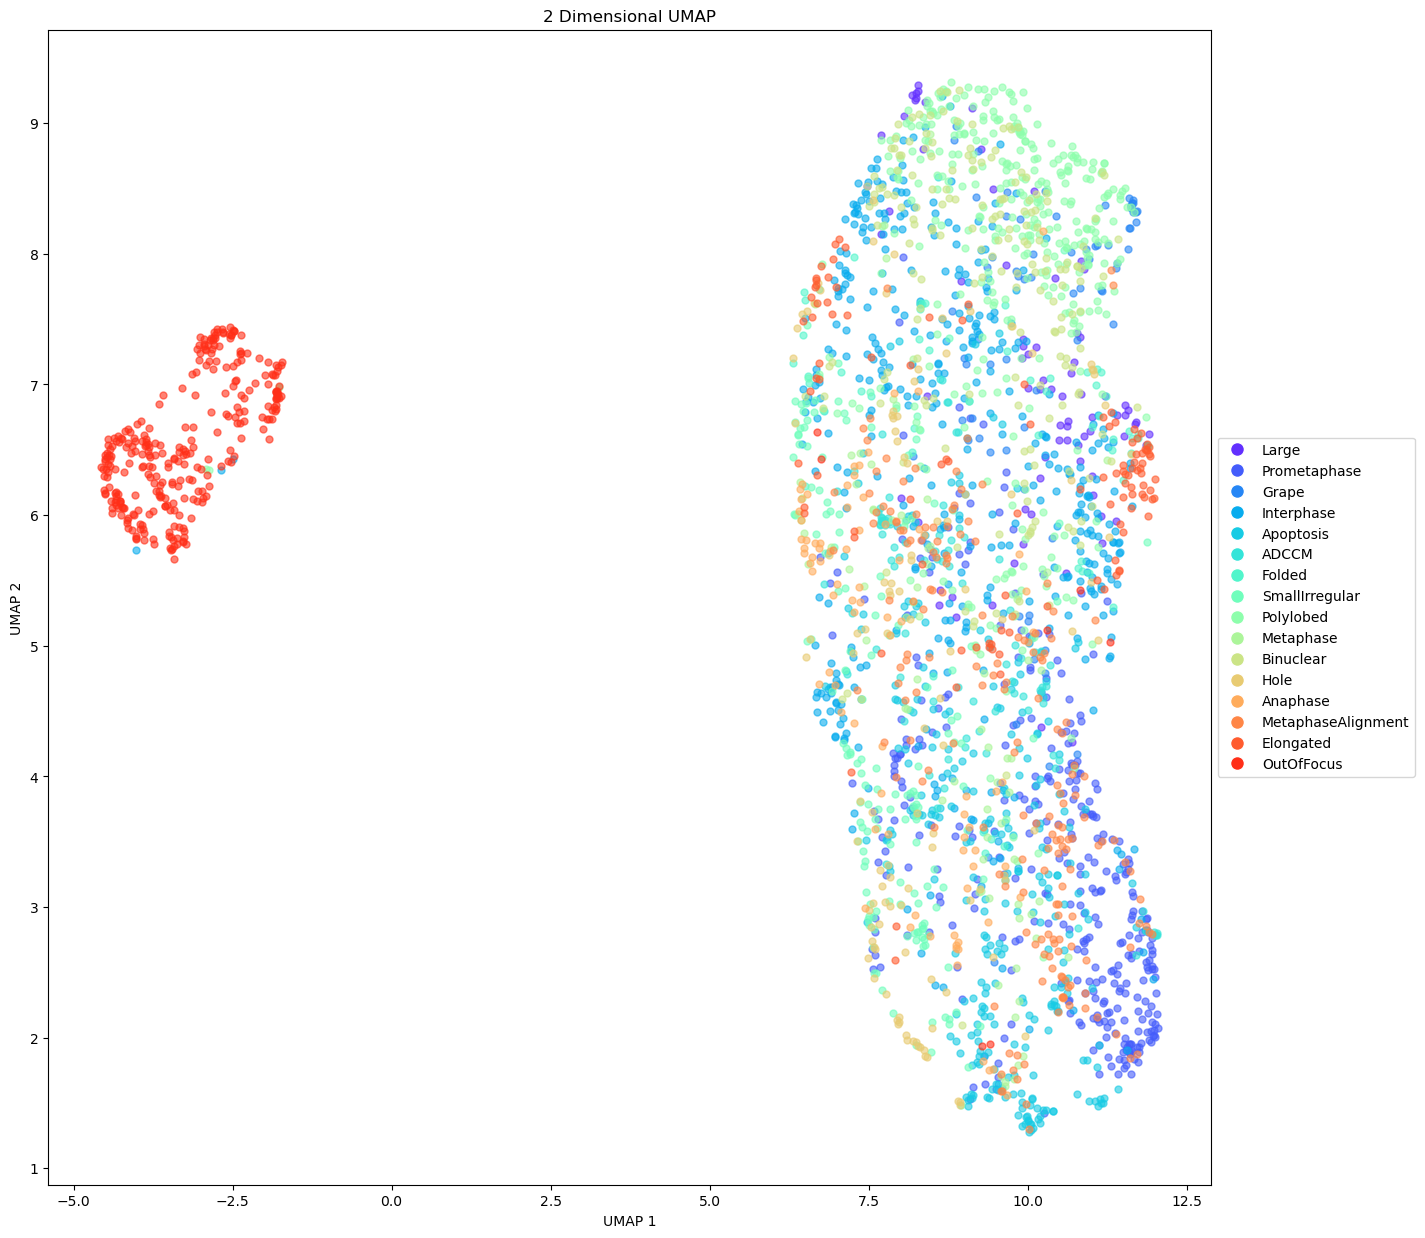

Showing UMAPs created with CP_and_DP features


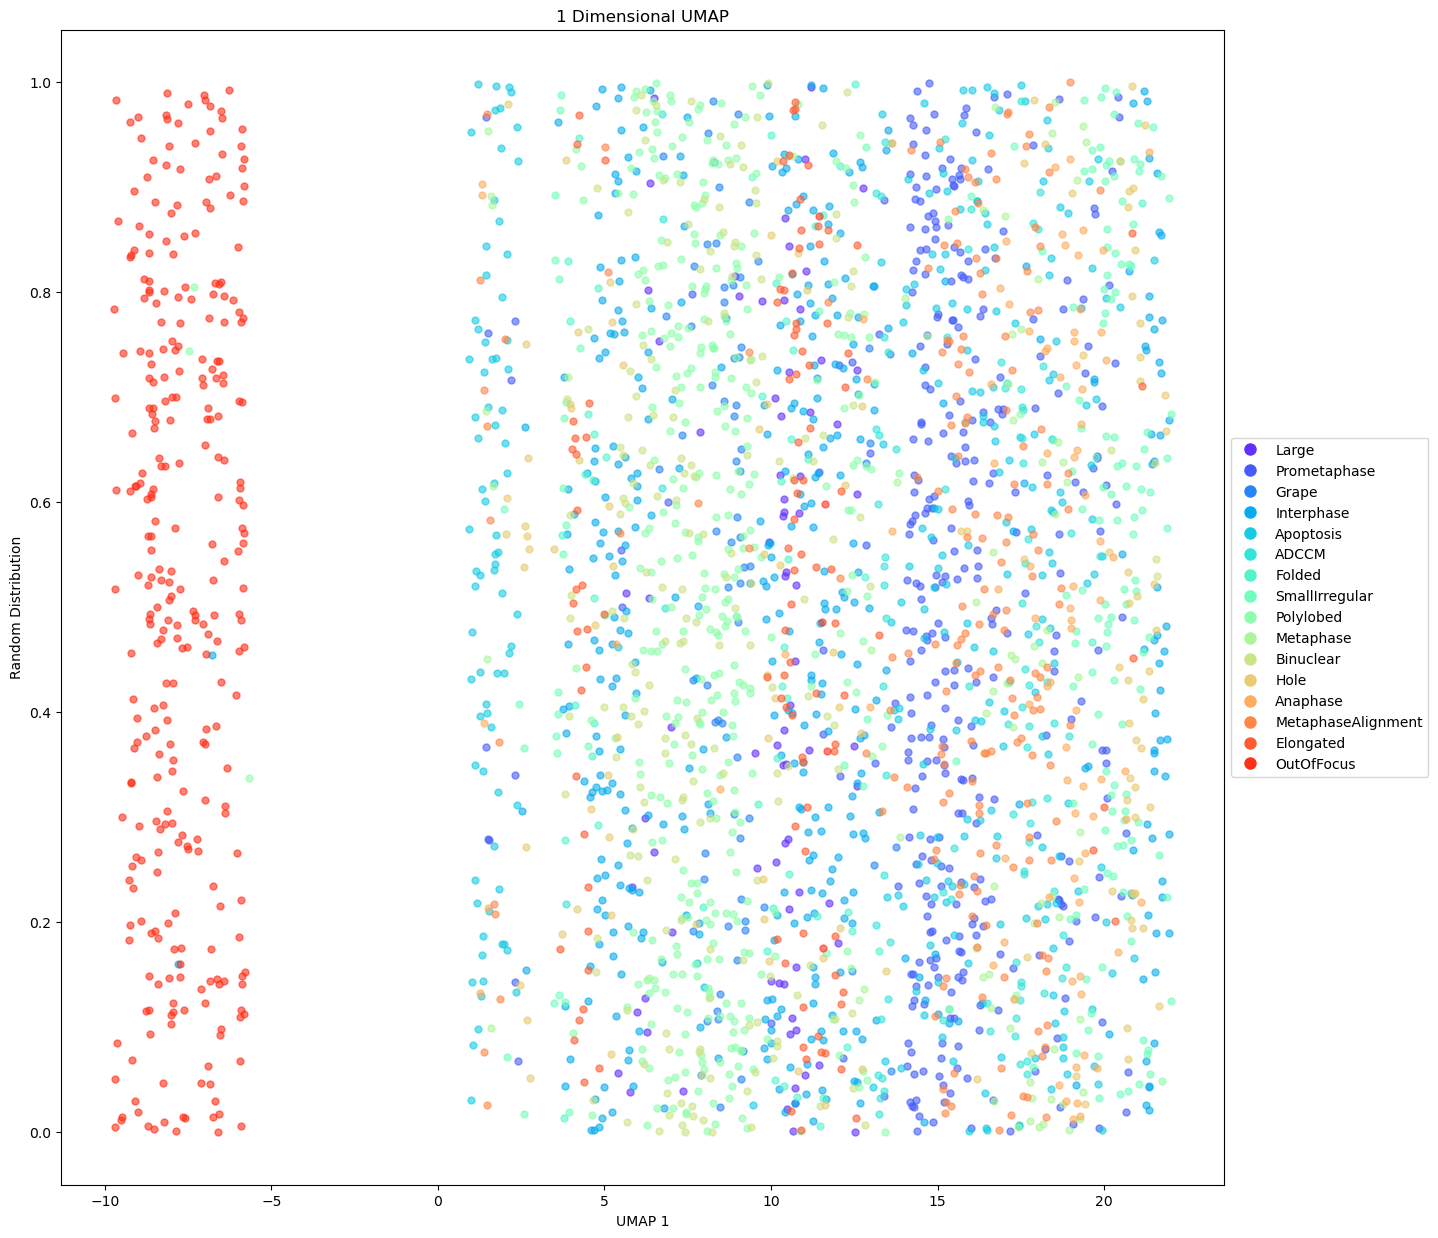

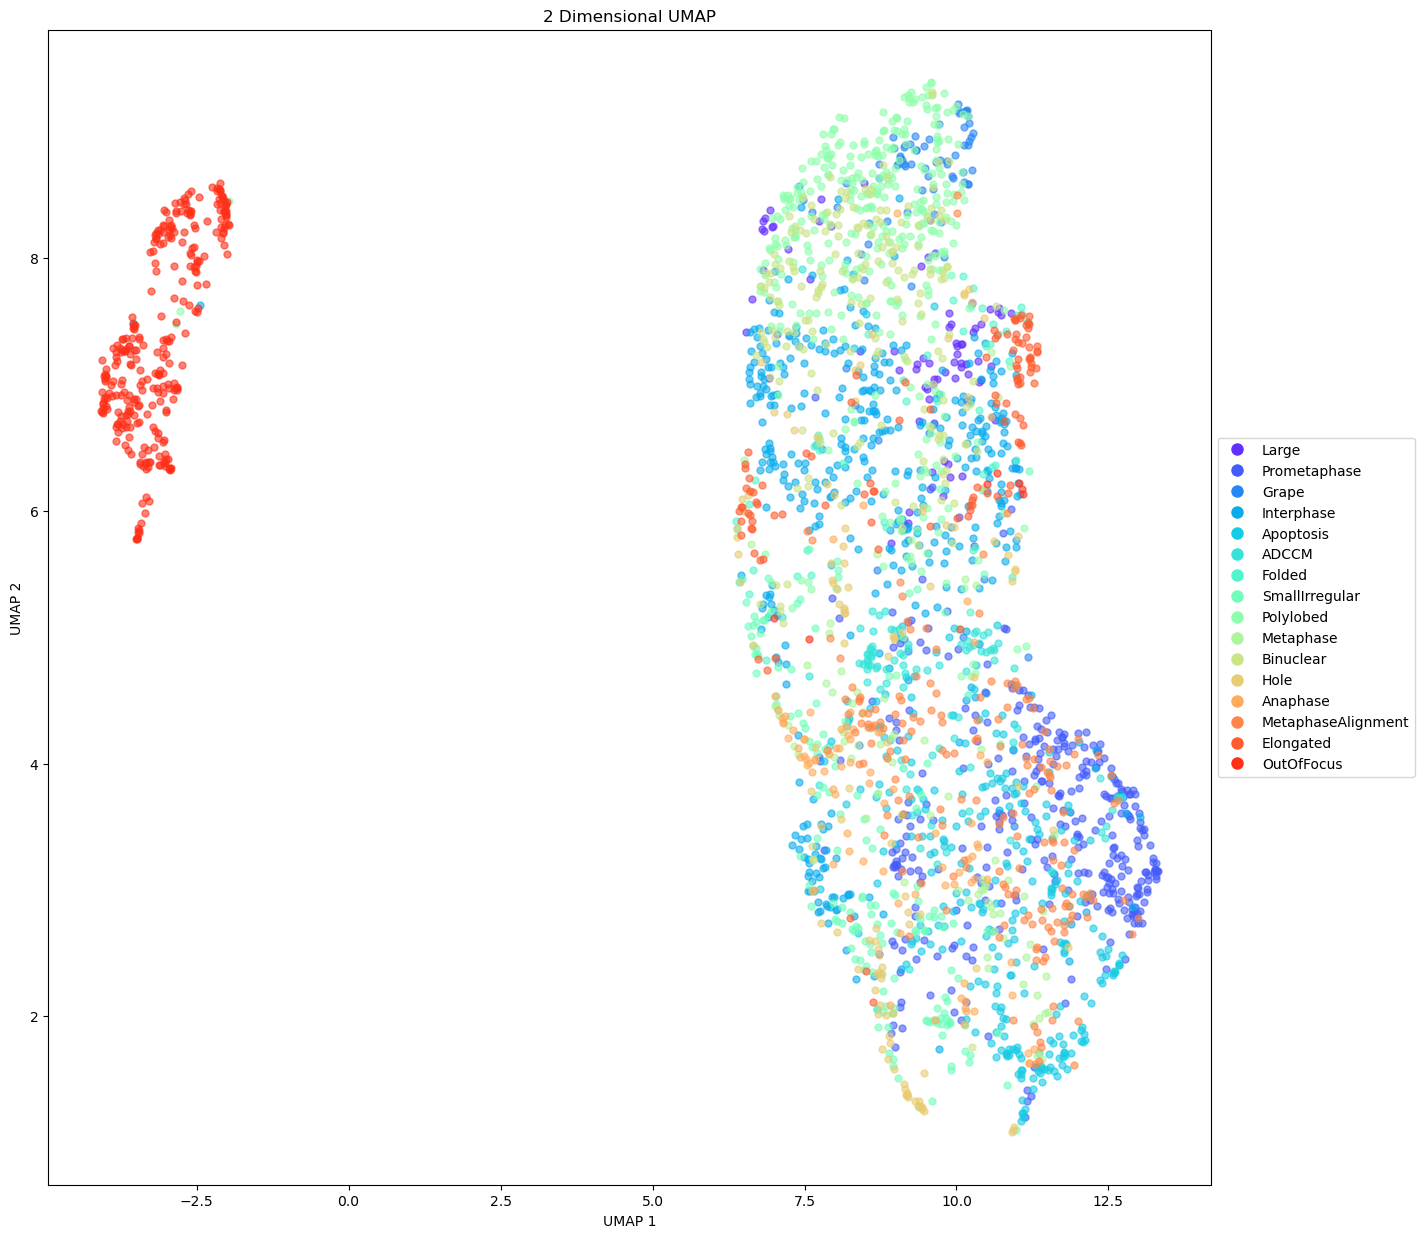

In [5]:
# list to compile embeddings tidy data
compiled_tidy_embeddings = []

# feature types to create UMAPs for
feature_types = ["CP", "DP", "CP_and_DP"]

# create 1D and 2D umaps for each feature type
for feature_type in feature_types:
    print(f"Showing UMAPs created with {feature_type} features")

    # the trainind data dataframe is split into two components:
    # metadata: info about the cell including its labeled phenotypic class, location, perturbation, etc
    # feature data: the CP, DP, or merged features for each cell
    metadata_dataframe, feature_data = split_data(training_data, feature_type)
    phenotypic_classes = metadata_dataframe["Mitocheck_Phenotypic_Class"]

    # show 1D umaps
    # class colors 1 - all classes included
    show_1D_umap(
        feature_data,
        phenotypic_classes,
        class_colors_1,
        point_size=point_size,
        alpha=alpha,
    )

    # show 2D umaps
    # class colors 1 - all classes included
    embeddings_2D = show_2D_umap(
        feature_data,
        phenotypic_classes,
        class_colors_1,
        point_size=point_size,
        alpha=alpha,
    )

    # add feature types column for tidy long data
    embeddings_2D["Feature_Type"] = feature_type
    # add cell UUID types column for tidy long data
    embeddings_2D["Cell_UUID"] = metadata_dataframe["Cell_UUID"]
    # melt embeddings data into tidy format
    embeddings_2D = pd.melt(
        embeddings_2D,
        id_vars=["Mitocheck_Phenotypic_Class", "Feature_Type", "Cell_UUID"],
        value_vars=["UMAP1", "UMAP2"],
        var_name="UMAP_Embedding",
        value_name="Embedding_Value",
    )

    # add these tidy embeddings to compilation
    compiled_tidy_embeddings.append(embeddings_2D)

### Save and preview tidy embedding data


In [6]:
# compile tidy embeddings into one dataframe
compiled_tidy_embeddings = pd.concat(compiled_tidy_embeddings).reset_index(drop=True)

# save tidy embeddings
compiled_tidy_embeddings_save_path = pathlib.Path(
    f"{results_dir}/compiled_2D_umap_embeddings.csv"
)
compiled_tidy_embeddings.to_csv(compiled_tidy_embeddings_save_path)

# preview tidy embeddings data
compiled_tidy_embeddings

,Mitocheck_Phenotypic_Class,Feature_Type,Cell_UUID,UMAP_Embedding,Embedding_Value
0,Large,CP,21da27ab-873a-41f4-ab98-49170cae9a2d,UMAP1,6.878828
1,Large,CP,82f7949b-4ea2-45c8-8dd9-7854caf49077,UMAP1,9.861547
2,Large,CP,cec7234f-fe35-4411-aded-f8112bb31219,UMAP1,6.802670
3,Large,CP,43d9e7c9-c9ec-45ce-8820-048bfb896989,UMAP1,8.546513
4,Large,CP,63ce6652-338e-4afd-9c77-dbc0e903bf92,UMAP1,8.440182
...,...,...,...,...,...
17491,OutOfFocus,CP_and_DP,380728fc-28b0-423f-b8a7-07be1af590d9,UMAP2,6.960979
17492,OutOfFocus,CP_and_DP,30ed67c7-8de2-4d78-bce9-3fa1aff28565,UMAP2,8.208654
17493,OutOfFocus,CP_and_DP,2960b13e-6090-4592-b2a9-d1c4c1b24b50,UMAP2,7.153923
17494,OutOfFocus,CP_and_DP,fbc9ce6a-2b29-4115-b218-4ee5b8c50ac1,UMAP2,7.938281
